## What is Binary Heap ?

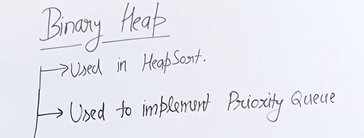

#### two types:
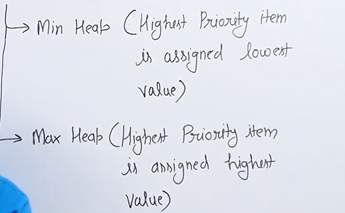

#### A binary heap tree is:
1. A complete binary tree: if it's all levels are completely filled except possibly the last level and the last level has to be filled from left to right.
2. Typically, data is stored in an array
3. left(i) = 2*i + 1
4. right(i) = 2*i + 2
5. parent(i) = floor((i-1)/2) 

#### Benefits of having a complete binary tree:
1. We need completely binary tree, so that, we can fetch the items (mentioned in 3,4,5 above) easily
2. We get minimal possible height of our tree and we need minimal possible height as our operations like insert, heapify, etc. are dependent on the height of the tree
3. We also don't need to use linked list (We save more space here as in array we don't need pointers -> next, head, tail, etc.)


### MinHeap Properties:

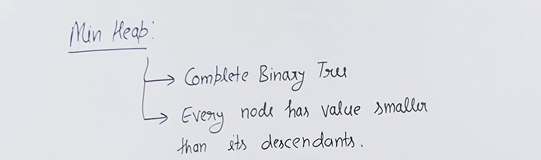

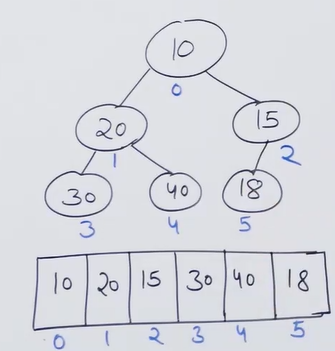

### Code:

In [322]:
import math

In [484]:
class myMinHeap:
    def __init__(self, myarr2):
        self.arr=myarr2
        
        # start building the minheap:
        # Naive way is to sort the given array and but it would take O(nlogn)
        
        # This is called Build heap 
        # 2nd way which would take O(n) time:
        i = len(self.arr)-1
        i=(i-1)//2  #basically parent of the last index i.e. right most internal node
        while i >=0:
            self.minHeapify(i)
            i=i-1   
        
    def parent(self, i):
        return (i-1)//2
    
    def lchild(self, i):
        return (2*i + 1)
    
    def rchild(self, i):
        return (2*i + 2)
    
    # Time complexity is O(logn) because we traverse across height of a tree
    def insert(self,item):
        self.arr.append(item)
        ## Reason for not using below code is because when same element is inserted more than once, the index of the first occurence will be 
        ## return always, which makes insertion process prone to error and fails the binary heap properties
        # index = self.arr.index(item)
        
        # That is why we use this code, necause we always insert the element in the last and need that index only for traversal
        index = len(self.arr)-1
        
        while index > 0 and self.arr[self.parent(index)] > self.arr[index]:
            parent_index = self.parent(index)
            self.arr[index], self.arr[parent_index]=self.arr[parent_index], self.arr[index]
            index = parent_index
        
    # Time complexity is O(logn) as we traverse at tree height level
    def minHeapify(self, index):
        item = self.arr[index]
        # index = self.arr.index(item)  
        arr_length = len(self.arr)
        while index*2 + 1 < len(self.arr):
            print(index)
            
            min_element_index= index
            lt = self.lchild(index)
            rt = self.rchild(index)
            
            if self.lchild(index) < arr_length and self.arr[lt] < self.arr[min_element_index]:
                # min_element=self.arr[lt]
                min_element_index = lt
                
            if self.rchild(index) < arr_length and self.arr[rt] < self.arr[min_element_index]:
                # min_element=self.arr[rt]   
                 min_element_index = rt
            # min_element = min(item, self.arr[self.lchild(index)], self.arr[self.rchild(index)])
            
            if min_element_index!=index:
                # min_element_index = self.arr.index(min_element)
                self.arr[index], self.arr[min_element_index] =  self.arr[min_element_index], self.arr[index]
                index = min_element_index
                item = self.arr[index]
            else:
                break;
    # Time complexity is O(logn) 
    def extractMin(self):
        if len(self.arr)==0:
            return math.inf
        result = self.arr[0]
        self.arr[-1], self.arr[0]=self.arr[0], self.arr[-1]
        self.arr.pop(-1)
        self.minHeapify(0)
        return result
    
    # Time complexity is O(logn)
    def decreaseKey(self,index,item):
        self.arr[index]=item
        while index!=0 and self.arr[self.parent(index)]> self.arr[index]:
            parent_index = self.parent(index)
            self.arr[parent_index], self.arr[index] = self.arr[index], self.arr[parent_index]
            index = parent_index
         
    # Time complexity is O(logn)
    def delete(self, index):
        self.arr[index], self.arr[-1] = self.arr[-1], self.arr[index]   
        self.arr.pop(-1)
        self.minHeapify(index)
        
    

In [485]:
myarr=[40,1,5,15,10,11,5,2,20]
len(myarr), myarr

(9, [40, 1, 5, 15, 10, 11, 5, 2, 20])

In [486]:
m_min_heap =  myMinHeap(myarr.copy())
# we pass copy because in Python, if you pass a list to a function and perform operations on that list, it can change the original list. 
# This is because lists are mutable objects in Python. When you pass a list to a function, you are actually passing a reference to the 
# original list, not a copy of it. Therefore, any changes made to the list inside the function will affect the original list

# Example:
# def modify_list(lst):
#     lst.append(4)

# original_list = [1, 2, 3]
# modify_list(original_list)
# print(original_list)  # Output: [1, 2, 3, 4]


3
2
1
0
1
3


In [487]:
myarr

[40, 1, 5, 15, 10, 11, 5, 2, 20]

In [488]:
m_min_heap.arr

[1, 2, 5, 15, 10, 11, 5, 40, 20]

#### ExtractMin

In [489]:
m_min_heap.extractMin()

0
1


1

In [490]:
m_min_heap.arr

[2, 10, 5, 15, 20, 11, 5, 40]

In [491]:
m_min_heap.extractMin()

0
2


2

In [492]:
m_min_heap.arr

[5, 10, 5, 15, 20, 11, 40]

In [493]:
m_min_heap.extractMin()

0
2


5

In [494]:
m_min_heap.arr

[5, 10, 11, 15, 20, 40]

#### Insert

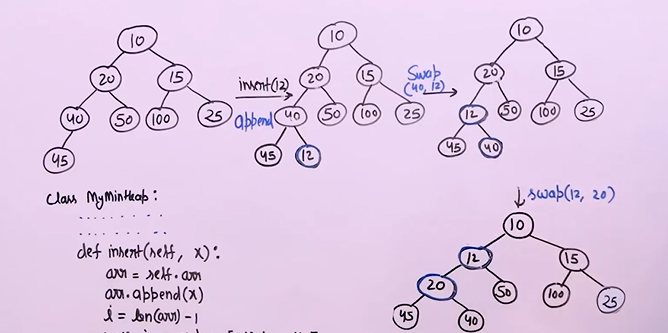

In [495]:
m_min_heap.insert(12)

In [496]:
m_min_heap.arr

[5, 10, 11, 15, 20, 40, 12]

In [497]:
m_min_heap.insert(5)

In [498]:
m_min_heap.arr

[5, 5, 11, 10, 20, 40, 12, 15]

In [499]:
m_min_heap.insert(150)

In [500]:
m_min_heap.arr

[5, 5, 11, 10, 20, 40, 12, 15, 150]

#### ExtractMin

In [501]:
m_min_heap.extractMin()

0
1
3


5

In [502]:
m_min_heap.arr

[5, 10, 11, 15, 20, 40, 12, 150]

#### decreasekey

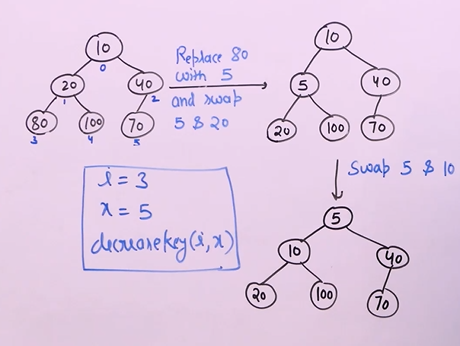

In [503]:
m_min_heap.decreaseKey(2,5)

In [504]:
m_min_heap.arr

[5, 10, 5, 15, 20, 40, 12, 150]

#### delete

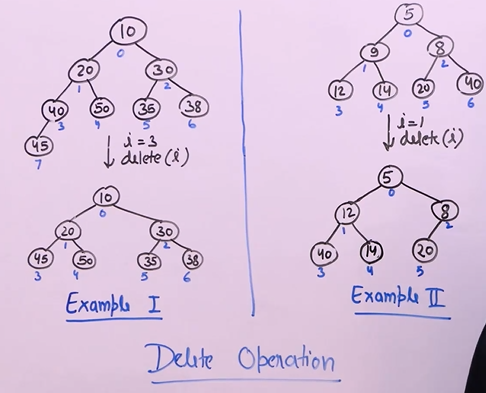

In [505]:
m_min_heap.delete(2)

2


In [506]:
m_min_heap.arr

[5, 10, 12, 15, 20, 40, 150]

In [507]:
m_min_heap.delete(0)

0
1


In [508]:
m_min_heap.arr

[10, 15, 12, 150, 20, 40]

### Time complexity of buildheap:

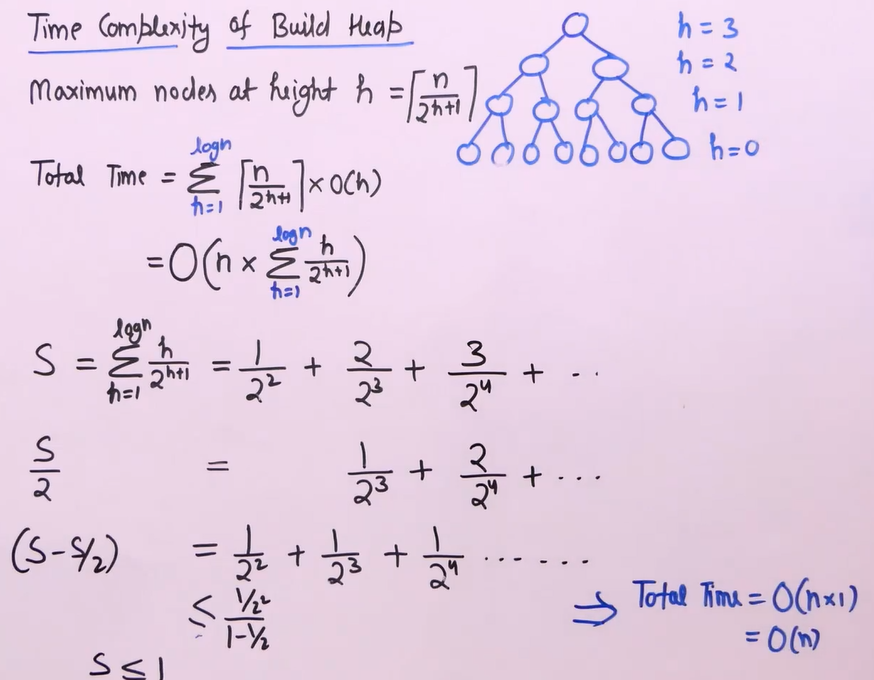

### Heap Sort

* This can be seen as an optimization over selection sort
* In selection sort, we find the maximum value and swap it with the last element.
* Them we again find the maximum element in remaining elements and swap the max with the last element from the reamining elements
* Now, heap sort says that, we can maintain a binary heap for these remaining elements and find the maximum in O(logn) time instead of O(n) and make the entire search in O(nlogn) instead of O(n^2)

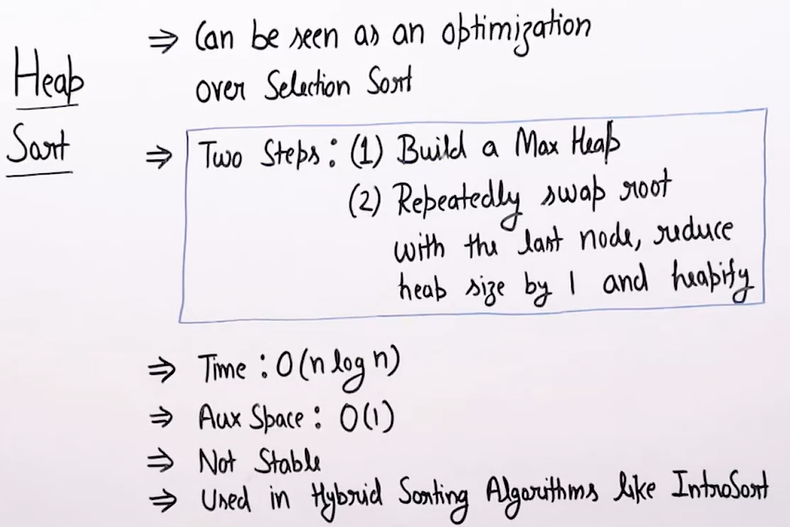

* Not stable as elements with same value may have different order since we swap the max value the last element in the array
* Heap sort is slower than Quick sort because quick sort has better locality of reference. Heap sort is not a contigous travel as we travel from parent to child
* User in hybrid sort lilke Introsort- > Insert sort + Heap Sort + Quick Sort

In [541]:
class myHeapSort:
    def __init__(self, arr):
        self.arr=arr
    
    def parent(self, i):
        return (i-1)//2
    
    def lchild(self, i):
        return (2*i + 1)
    
    def rchild(self, i):
        return (2*i + 2)    
    
    def minHeapify2(self, index):
        # item = self.myarr[index]
        arr_len = len(self.myarr)
        
        while index*2+1 < len(self.myarr):
            min_element_index=index
            lt = self.lchild(index)
            rt = self.rchild(index)
            
            if lt<arr_len and self.myarr[lt] < self.myarr[min_element_index]:
                min_element_index = lt
            if rt < arr_len and self.myarr[rt] < self.myarr[min_element_index]:
                min_element_index = rt
            
            # print(item ,"->", min_element, "->", index)
            if min_element_index!=index:
                # min_element_index = myarr.index(min_element)
                self.myarr[index], self.myarr[min_element_index] = self.myarr[min_element_index], self.myarr[index]
                index = min_element_index
                # item = myarr[index]
                # print(item, "->", index, "->", arr_len)
            else:
                break;
            # print(myarr,"\n")
        # return myarr
    
    # def extractMin(self, myarr):
    #     mymin = myarr[0]
    #     myarr[0],myarr[-1]= myarr[-1], myarr[0]
    #     # myarr.pop(-1)
    #     myarr = self.minHeapify(0)
        
        
    
    def heapSort(self, ascending=True):
        # arr_len=len(self.arr)
        self.myarr = self.arr.copy()
        sorted_arr=[0]*len(self.arr)
        
        # Sorting in descending order
        if ascending==False:
            i=len(self.arr)-1
            while len(self.myarr)>=1:
                self.myarr[0],self.myarr[-1]= self.myarr[-1], self.myarr[0]
                # print(myarr[-1])
                sorted_arr[i]=self.myarr[-1]
                i-=1
                self.myarr.pop(-1)
                if len(self.myarr)>0:
                    self.minHeapify2(0)
        
        # Sorting in ascending order
        else:
            i=0
            while len(self.myarr)>=1:
                self.myarr[0],self.myarr[-1]= self.myarr[-1], self.myarr[0]
                # print(myarr[-1])
                # sorted_arr.append(self.myarr[-1])
                sorted_arr[i]=self.myarr[-1]
                i+=1
                self.myarr.pop(-1)
                if len(self.myarr)>0:
                    self.minHeapify2(0)
        return sorted_arr

In [542]:
myarr=[40,1,15,10,11,5,2,20]
len(myarr), myarr

(8, [40, 1, 15, 10, 11, 5, 2, 20])

In [543]:
# Firt build the BinaryHeap
m_min_heap =  myMinHeap(myarr.copy())

3
2
1
0
1
3


In [544]:
m_min_heap.arr

[1, 10, 2, 20, 11, 5, 15, 40]

In [545]:
# Now, use this binaryHeap for sorting
myheap = myHeapSort(arr=m_min_heap.arr.copy())

In [546]:
myheap.arr

[1, 10, 2, 20, 11, 5, 15, 40]

In [547]:
myheap.heapSort()

[1, 2, 5, 10, 11, 15, 20, 40]

In [548]:
myheap.heapSort(ascending=False)

[40, 20, 15, 11, 10, 5, 2, 1]

In [549]:
myheap.arr
# original array is still in Binaryheap format

[1, 10, 2, 20, 11, 5, 15, 40]